In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import scipy.stats as stats
import string

In [99]:
data_path = '/home/michaelneuder/github/shakespeare/data'

In [100]:
data = pd.read_csv(os.path.join(data_path, 'wiki_movie_plots_deduped.csv'))

In [101]:
words = ''
remove = string.punctuation
pattern = r"[{}]".format(remove) 

for index, row in data.iterrows():
    words += re.sub(pattern, "",row['Plot'].lower())

In [102]:
words = words.split()

In [103]:
counts = dict()
for word in words:
    counts[word] = counts.get(word, 0) + 1

In [104]:
sorted_by_value = sorted(counts.items(), key=lambda kv: kv[1])

In [105]:
sorted_max = sorted_by_value[::-1]

In [106]:
vals_plots = [val[1]/sorted_max[0][1] for val in sorted_max[:1000]]

In [121]:
plt.style.use('ggplot')

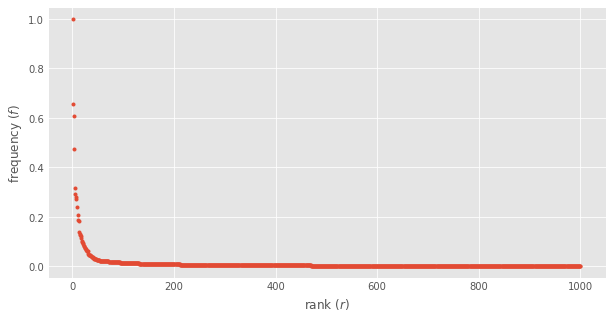

In [123]:
f, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(1, len(vals_plots)+1), vals_plots, '.')
ax.set_xlabel('rank ($r$)')
ax.set_ylabel('frequency ($f$)')
plt.savefig('modern_normal.png')

In [69]:
shake_data = pd.read_csv(os.path.join(data_path, 'Shakespeare_data.csv'))

In [70]:
words = ''
remove = string.punctuation
pattern = r"[{}]".format(remove) 

for index, row in shake_data.iterrows():
    words += re.sub(pattern, "",row['PlayerLine'].lower())

In [71]:
words = words.split()

In [72]:
counts = dict()
for word in words:
    counts[word] = counts.get(word, 0) + 1

In [73]:
sorted_by_value = sorted(counts.items(), key=lambda kv: kv[1])

In [74]:
sorted_max = sorted_by_value[::-1]

In [78]:
vals_shake = [val[1]/sorted_max[0][1] for val in sorted_max[:1000]]

In [79]:
stats.ttest_rel(vals_plots, vals_shake)

Ttest_relResult(statistic=-11.817634811924625, pvalue=2.947533195048136e-30)

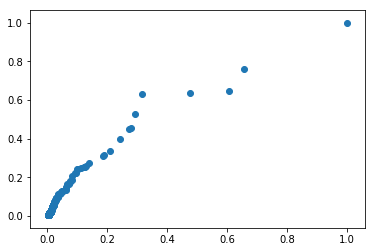

In [80]:
plt.scatter(vals_plots, vals_shake)

In [52]:
np.asarray(vals_plots) - np.asarray(vals_shake)

array([ 0.        , -0.10866409, -0.040039  , -0.16174283, -0.31620796,
       -0.23638498, -0.17465129, -0.17773149, -0.15904616, -0.12781848,
       -0.12822364, -0.12500439, -0.13411061, -0.12564274, -0.12960129,
       -0.13052383, -0.13646493, -0.13969712, -0.1433071 , -0.12359439,
       -0.12824353, -0.12505272, -0.10450195, -0.10298916, -0.10171722,
       -0.09629023, -0.09596494, -0.0861651 , -0.08531952, -0.07553085,
       -0.07772073, -0.08114648, -0.08097524, -0.07902216, -0.07571105,
       -0.07279161, -0.07226139, -0.07448705, -0.07628134, -0.07190687,
       -0.06325552, -0.06025546, -0.06279663, -0.06260457, -0.06000177,
       -0.05578895, -0.05338426, -0.05352912, -0.053512  , -0.05303916,
       -0.05130913, -0.05022452, -0.04801545, -0.04942502, -0.04962875,
       -0.04641181, -0.04325039, -0.04356706, -0.04291337, -0.04191615,
       -0.04016781, -0.03984938, -0.03987433, -0.03828646, -0.03802502,
       -0.03781111, -0.03719537, -0.03630665, -0.03622074, -0.03

In [56]:
np.asarray(vals_plots) - np.asarray([1/n for n in range(1,101)])

array([0.        , 0.15469941, 0.27394614, 0.22458469, 0.11517584,
       0.12623549, 0.13590141, 0.14674986, 0.1294896 , 0.1092815 ,
       0.09625019, 0.10108625, 0.06148893, 0.05867797, 0.05815712,
       0.06047429, 0.05472258, 0.04593029, 0.04484702, 0.0461805 ,
       0.04373575, 0.03704073, 0.03701207, 0.03305328, 0.034138  ,
       0.03183397, 0.02903731, 0.02647639, 0.02608163, 0.02699987,
       0.01974974, 0.01600784, 0.0169495 , 0.01661574, 0.01657384,
       0.01604946, 0.01353436, 0.01184338, 0.01041487, 0.01097219,
       0.01061069, 0.0106161 , 0.00695131, 0.00696566, 0.00729267,
       0.00766283, 0.00796991, 0.006282  , 0.00615046, 0.00606037,
       0.00637281, 0.00637786, 0.00603651, 0.00475565, 0.0047562 ,
       0.00507556, 0.00528388, 0.00513727, 0.00528866, 0.00546485,
       0.0057208 , 0.00577396, 0.00596088, 0.00598701, 0.00613572,
       0.00618546, 0.00614455, 0.00628166, 0.00644828, 0.00661546,
       0.0061736 , 0.00570887, 0.0058978 , 0.00567635, 0.00571

In [82]:
stats.ttest_rel(vals_shake, np.asarray([1/n for n in range(1,1001)]))

Ttest_relResult(statistic=11.007158078965103, pvalue=1.1208721185766098e-26)

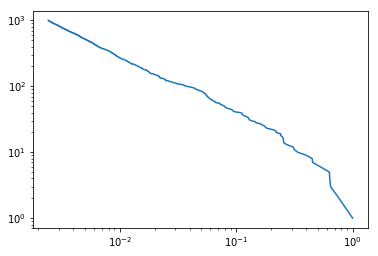

In [86]:
plt.loglog(vals_shake, np.arange(1, len(vals_shake)+1))

In [96]:
log_shake = np.log(vals_shake)
log_posts = np.log(vals_plots)
log_rank = np.log(np.arange(1, len(vals_shake)+1))

In [97]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_rank, log_posts)

In [98]:
slope

-0.9630066837798338